In [2]:
!pip install binance-futures-connector
!pip install pandas scikit-learn
!pip install matplotlib
!pip install scipy

In [3]:
from binance.um_futures import UMFutures

In [4]:
um_futures_client = UMFutures()

In [8]:
btc_24h_ticker = um_futures_client.ticker_24hr_price_change("BTCUSDT")
btc_24h_ticker

{'symbol': 'BTCUSDT',
 'priceChange': '512.80',
 'priceChangePercent': '0.894',
 'weightedAvgPrice': '57936.61',
 'lastPrice': '57875.60',
 'lastQty': '0.028',
 'openPrice': '57362.80',
 'highPrice': '58606.60',
 'lowPrice': '57171.00',
 'volume': '259303.848',
 'quoteVolume': '15023186308.96',
 'openTime': 1726091280000,
 'closeTime': 1726177718965,
 'firstId': 5376035814,
 'lastId': 5379449623,
 'count': 3413797}

In [6]:
all_24h_ticker = um_futures_client.ticker_24hr_price_change()

In [7]:
all_24h_ticker

[{'symbol': 'HIFIUSDT',
  'priceChange': '0.0059000',
  'priceChangePercent': '1.363',
  'weightedAvgPrice': '0.4361994',
  'lastPrice': '0.4387000',
  'lastQty': '25',
  'openPrice': '0.4328000',
  'highPrice': '0.4418000',
  'lowPrice': '0.4292000',
  'volume': '6987191',
  'quoteVolume': '3047808.6398000',
  'openTime': 1726091220000,
  'closeTime': 1726177652646,
  'firstId': 101632162,
  'lastId': 101656174,
  'count': 24013},
 {'symbol': 'ONEUSDT',
  'priceChange': '0.00046',
  'priceChangePercent': '3.990',
  'weightedAvgPrice': '0.01183',
  'lastPrice': '0.01199',
  'lastQty': '1631',
  'openPrice': '0.01153',
  'highPrice': '0.01208',
  'lowPrice': '0.01144',
  'volume': '314340860',
  'quoteVolume': '3717456.73694',
  'openTime': 1726091280000,
  'closeTime': 1726177684249,
  'firstId': 277326877,
  'lastId': 277354252,
  'count': 27376},
 {'symbol': 'PEOPLEUSDT',
  'priceChange': '-0.00174',
  'priceChangePercent': '-2.934',
  'weightedAvgPrice': '0.05825',
  'lastPrice': '0

In [9]:
len(all_24h_ticker)

327

In [11]:
def compute_percentual_price_change_average(ticker_24h):
    price_changes = [float(ticker["priceChangePercent"]) for ticker in ticker_24h]
    return sum(price_changes) / len(price_changes)

In [12]:
compute_percentual_price_change_average(all_24h_ticker)

2.3273425076452603

In [15]:
def compute_percentual_price_change_waverage(ticker_24h):
    # a*x + b*y + ... / (a+b+...)
    den = 0
    num = 0
    for ticker in ticker_24h:
        den +=  float(ticker["priceChangePercent"])*float(ticker["quoteVolume"])
        num += float(ticker["quoteVolume"])
    return den / num

In [16]:
compute_percentual_price_change_waverage(all_24h_ticker)

1.9705117463860278

In [25]:
def compute_percentual_price_pos_and_neg(ticker_24h):
    pos = []
    neg = []
    for ticker in ticker_24h:
        if float(ticker["priceChangePercent"]) > 0:
            pos += [ticker["symbol"]]
        else:
            neg += [ticker["symbol"]]
    return pos, neg, len(pos)/len(ticker_24h), len(neg)/len(ticker_24h)

In [26]:
pos, neg, pos_prop, neg_prop = compute_percentual_price_pos_and_neg(all_24h_ticker)

In [28]:
pos_prop, neg_prop

(0.8042813455657493, 0.19571865443425077)

In [30]:
neg

['PEOPLEUSDT',
 'ARUSDT',
 'CTKUSDT',
 'RENUSDT',
 'BCHUSDT',
 'DASHUSDT',
 'BONDUSDT',
 'NULSUSDT',
 'KASUSDT',
 'CELOUSDT',
 'OPUSDT',
 'GLMRUSDT',
 'VIDTUSDT',
 'RUNEUSDT',
 'SUPERUSDT',
 'ETCUSDT',
 'BTCDOMUSDT',
 'MTLUSDT',
 'OGNUSDT',
 '1000XECUSDT',
 'BSVUSDT',
 'IDEXUSDT',
 'SLPUSDT',
 'JASMYUSDT',
 'NOTUSDT',
 'STPTUSDT',
 'STRAXUSDT',
 'USDCUSDT',
 'ZECUSDT',
 'BSWUSDT',
 'IMXUSDT',
 'TRBUSDT',
 'AERGOUSDT',
 'SAGAUSDT',
 'NEIROETHUSDT',
 'MANTAUSDT',
 'COTIUSDT',
 'KSMUSDT',
 'SNTUSDT',
 'ENSUSDT',
 'FLUXUSDT',
 'ICPUSDT',
 'MEWUSDT',
 'LEVERUSDT',
 'APEUSDT',
 'ENAUSDC',
 'XMRUSDT',
 'ENAUSDT',
 'ATOMUSDT',
 'GTCUSDT',
 'GMTUSDT',
 'CVXUSDT',
 'UNIUSDT',
 'AAVEUSDT',
 'TRXUSDT',
 'ETHBTC',
 'ACHUSDT',
 'BCHUSDC',
 'TURBOUSDT',
 'RPLUSDT',
 'KEYUSDT',
 'DARUSDT',
 'RADUSDT',
 'RAREUSDT']

In [31]:
def compute_percentual_price_pos_and_neg(ticker_24h):
    pos = {}
    neg = {}
    for ticker in ticker_24h:
        if float(ticker["priceChangePercent"]) > 0:
            pos[ticker["symbol"]] = float(ticker["priceChangePercent"])
        else:
            neg[ticker["symbol"]] = float(ticker["priceChangePercent"])
    return pos, neg, len(pos)/len(ticker_24h), len(neg)/len(ticker_24h)

In [32]:
pos, neg, pos_prop, neg_prop = compute_percentual_price_pos_and_neg(all_24h_ticker)

In [37]:
import matplotlib.pyplot as plt

In [42]:
import pandas as pd

In [48]:
pos_df = pd.DataFrame.from_dict(pos, orient='index', columns=['priceChangePercent']).sort_values(by='priceChangePercent', ascending=False)
pos_df

,priceChangePercent
BIGTIMEUSDT,30.451
OCEANUSDT,18.943
DGBUSDT,18.862
AGIXUSDT,18.776
TWTUSDT,13.580
...,...
BANANAUSDT,0.091
WIFUSDC,0.078
HOTUSDT,0.062
WIFUSDT,0.052


array([[<Axes: title={'center': 'priceChangePercent'}>]], dtype=object)

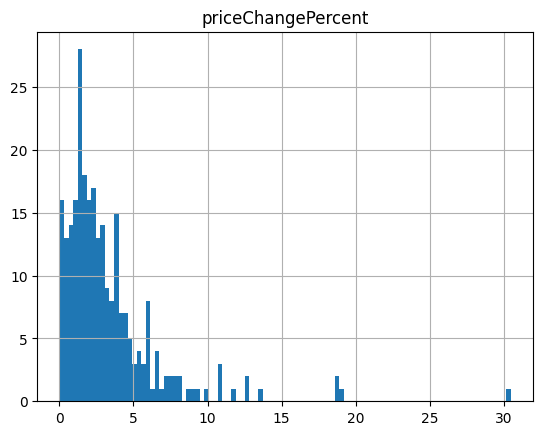

In [59]:
pos_df.hist(bins=100)

In [49]:
neg_df = pd.DataFrame.from_dict(neg, orient='index', columns=['priceChangePercent']).sort_values(by='priceChangePercent', ascending=False)
neg_df

,priceChangePercent
CELOUSDT,0.000
MANTAUSDT,0.000
JASMYUSDT,-0.005
USDCUSDT,-0.016
BTCDOMUSDT,-0.017
...,...
SUPERUSDT,-3.858
KEYUSDT,-3.965
GMTUSDT,-4.320
NEIROETHUSDT,-6.268


array([[<Axes: title={'center': 'priceChangePercent'}>]], dtype=object)

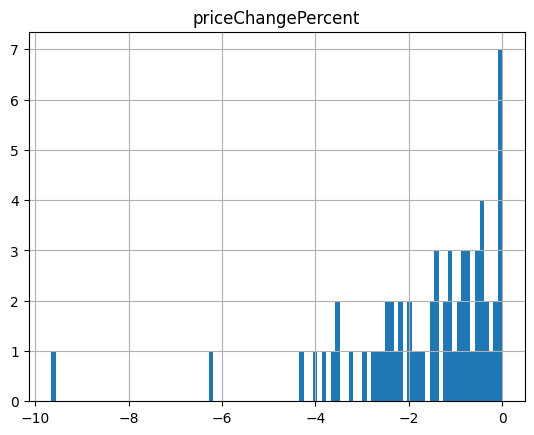

In [58]:
neg_df.hist(bins=100)

In [55]:
all_df = pd.concat([pos_df, neg_df])
all_df

,priceChangePercent
BIGTIMEUSDT,30.451
OCEANUSDT,18.943
DGBUSDT,18.862
AGIXUSDT,18.776
TWTUSDT,13.580
...,...
SUPERUSDT,-3.858
KEYUSDT,-3.965
GMTUSDT,-4.320
NEIROETHUSDT,-6.268


array([[<Axes: title={'center': 'priceChangePercent'}>]], dtype=object)

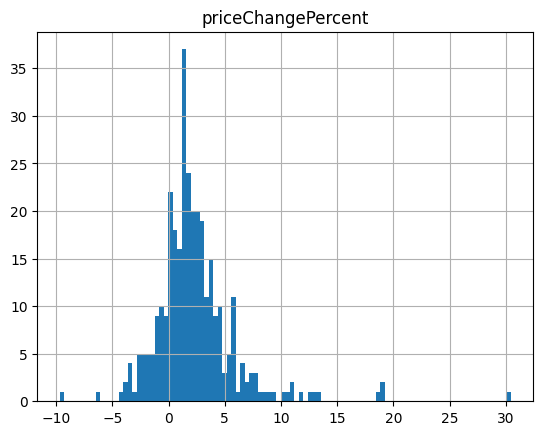

In [57]:
all_df.hist(bins=100)